# Importing all the libraries and the csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Reading the file
df = pd.read_csv('space_decay.csv')

# Data Cleaning & Validation Check

In [2]:
# Displying the head
print(df.head(1))
# printing all the columns
print(df.columns)

   CCSDS_OMM_VERS                            COMMENT        CREATION_DATE  \
0               2  GENERATED VIA SPACE-TRACK.ORG API  2021-11-01T06:46:11   

  ORIGINATOR      OBJECT_NAME  OBJECT_ID CENTER_NAME REF_FRAME TIME_SYSTEM  \
0    18 SPCS  ARIANE 42P+ DEB  1992-072J       EARTH      TEME         UTC   

  MEAN_ELEMENT_THEORY  ... RCS_SIZE  COUNTRY_CODE  LAUNCH_DATE   SITE  \
0                SGP4  ...   MEDIUM            FR       1992.0  FRGUI   

   DECAY_DATE     FILE      GP_ID          TLE_LINE0  \
0         NaN  3195178  188614016  0 ARIANE 42P+ DEB   

                                           TLE_LINE1  \
0  1 26741U 92072J   21304.94919376  .00000883  0...   

                                           TLE_LINE2  
0  2 26741   7.7156  90.2410 6528926 243.1216  38...  

[1 rows x 40 columns]
Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH'

In [3]:
# Checking for missing value
print(df.isnull().sum())
# to get the shape of the dataset
shape = df.shape
print(shape)
####TO BE NOTED THAT AS THE DECAY DATE FOR ALL THE OBJECTS IS NAN : ALL THE OBJECTS ARE ACTIVE####
print("CONCLUSION 1:ALL THE OBJECTS ARE ACTIVE ")

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [4]:
## Invalid Value Detection ##

# Checking for eccentricity 
#(It is checking for eccentricity values and updated the original column)
df = df[(df['ECCENTRICITY'] >= 0) & (df['ECCENTRICITY'] < 1)]
print(df['ECCENTRICITY'])

# Checking for inclination
df = df[(df['INCLINATION'] >= 0)& (df['INCLINATION']<=180)]
print(df['INCLINATION'])

# Checking for mean motion
df=df[(df['MEAN_MOTION']>=0)]
print(df['MEAN_MOTION'])

# Checking for semi-major axis
df=df[(df['SEMIMAJOR_AXIS']> 6378)]
print(df['SEMIMAJOR_AXIS'])

## Standardization of units & format ##

# Converting all the dates in the standard format
 # Convert to datetime format
date_columns = ['EPOCH', 'CREATION_DATE', 'DECAY_DATE', 'LAUNCH_DATE']
for i in date_columns:
    df[i] = pd.to_datetime(df[i], errors='coerce')

0        0.652893
1        0.003072
2        0.023739
3        0.006062
4        0.006226
           ...   
14367    0.001190
14368    0.005560
14369    0.056673
14370    0.005822
14371    0.002956
Name: ECCENTRICITY, Length: 14372, dtype: float64
0         7.7156
1        82.9193
2        12.1717
3        98.4781
4        98.4232
          ...   
14367    99.0098
14368    99.0272
14369    31.9916
14370    98.6758
14371    90.2762
Name: INCLINATION, Length: 14372, dtype: float64
0         2.921700
1        13.754973
2         1.038224
3        14.775907
4        14.724482
           ...    
14367    15.465781
14368    14.967557
14369    12.909691
14370    14.245319
14371    12.951574
Name: MEAN_MOTION, Length: 14372, dtype: float64
0        20668.618
1         7358.038
2        41197.852
3         7015.076
4         7031.400
           ...    
14367     6804.882
14368     6955.066
14369     7675.817
14370     7188.204
14371     7659.260
Name: SEMIMAJOR_AXIS, Length: 14372, dtype: float

# Deriving Orbital Parameters

In [5]:
# Deriving APOAPSIS_ALTITUDE, PERIAPSIS_ALTITUDE 

df['APOAPSIS_ALTITUDE']= df['SEMIMAJOR_AXIS']*(1-df['ECCENTRICITY']) + 6378.137
df['PERIAPSIS_ALTITUDE']= df['SEMIMAJOR_AXIS']*(1-df['ECCENTRICITY']) - 6378.137

# Deriving ORBITAL_ENERGY 

df['ORBITAL_ENERGY'] = -1*(398600/(2* df['SEMIMAJOR_AXIS']))
print(df['ORBITAL_ENERGY'])

# DERIVING ORBITAL_PERIOD

df['ORBITAL_PERIOD'] = (2*3.14)/(df['MEAN_MOTION'])
print(df['ORBITAL_PERIOD'])


0        -9.642638
1       -27.086025
2        -4.837631
3       -28.410241
4       -28.344284
           ...    
14367   -29.287797
14368   -28.655371
14369   -25.964663
14370   -27.725980
14371   -26.020791
Name: ORBITAL_ENERGY, Length: 14372, dtype: float64
0        2.149434
1        0.456562
2        6.048793
3        0.425016
4        0.426501
           ...   
14367    0.406058
14368    0.419574
14369    0.486456
14370    0.440847
14371    0.484883
Name: ORBITAL_PERIOD, Length: 14372, dtype: float64


# Classifying the objects based on altitude, shape, type

In [6]:
# Categorizing based on orbit altitude

def orbit_classification (PERIAPSIS_ALTITUDE):
    if PERIAPSIS_ALTITUDE >=160 and PERIAPSIS_ALTITUDE <= 2000 :
        return 'LEO'
    elif PERIAPSIS_ALTITUDE  > 2000    and PERIAPSIS_ALTITUDE <= 35786:
        return 'MEO'
    elif np.isclose(PERIAPSIS_ALTITUDE, 35786, atol = 100):
        return 'GEO'
    elif PERIAPSIS_ALTITUDE > 35786:
        return 'HEO'
    else :
        return 'Unknown' 

df['ORBIT_REGIME'] = df['PERIAPSIS_ALTITUDE'].apply(orbit_classification)
print(df['ORBIT_REGIME'])

0        LEO
1        LEO
2        MEO
3        LEO
4        LEO
        ... 
14367    LEO
14368    LEO
14369    LEO
14370    LEO
14371    LEO
Name: ORBIT_REGIME, Length: 14372, dtype: object


In [7]:
# knowing if the object is stable in orbit or not i.e. wheather the object is in a closed orbit or not

def stability_classification (ORBITAL_ENERGY):
    if ORBITAL_ENERGY < 0 :
        return 'closed orbit' 
    elif ORBITAL_ENERGY == 0 :
        return 'escape orbit'
    elif ORBITAL_ENERGY > 0 :
        return 'open orbit'
    else :
        return 'unknown'

df['OBJECT_STABILITY'] = df['ORBITAL_ENERGY'].apply(stability_classification)
print(df['OBJECT_STABILITY'])

0        closed orbit
1        closed orbit
2        closed orbit
3        closed orbit
4        closed orbit
             ...     
14367    closed orbit
14368    closed orbit
14369    closed orbit
14370    closed orbit
14371    closed orbit
Name: OBJECT_STABILITY, Length: 14372, dtype: object


In [ ]:
# knowing the orbit shape

def orbit_shape_classification (ECCENTRICITY):
    if ECCENTRICITY == 0 :
        return 'circular orbit'
    elif 0 < ECCENTRICITY < 1:
        return 'elliptical orbit'
    elif ECCENTRICITY == 1 :
        return 'parabolic trajectory'
    elif ECCENTRICITY > 1 :
        return 'hyperbolic trajectory'
    else :
        return 'unknown'
df['ORBIT_SHAPE'] = df['ECCENTRICITY'].apply(orbit_shape_classification)
print(df['ORBIT_SHAPE'])


0        elliptical orbit
1        elliptical orbit
2        elliptical orbit
3        elliptical orbit
4        elliptical orbit
               ...       
14367    elliptical orbit
14368    elliptical orbit
14369    elliptical orbit
14370    elliptical orbit
14371    elliptical orbit
Name: ORBIT_SHAPE, Length: 14372, dtype: object


In [ ]:
# To get all the objects present in a object type
print(df['OBJECT_TYPE'].unique())
# Classifying the objects on the basis of object type
def classification_object_type (OBJECT_TYPE):
    if OBJECT_TYPE == 'DEBRIS':
        return 'DEBRIS'
    elif OBJECT_TYPE == 'PAYLOAD':
        return 'PAYLOAD'
    elif OBJECT_TYPE == 'ROCKET_BODY':
        return 'ROCKET_BODY'
    else :
        return 'UNKNOWN'
df['OBJECT_CLASSIFICATION_TYPE'] = df['OBJECT_TYPE'].apply(classification_object_type)
#print(df['OBJECT_CLASSIFICATION_TYPE'])
# to count the number of objects under object_type
object_type_count = df['OBJECT_TYPE'].value_counts()
print(object_type_count)

['DEBRIS' 'PAYLOAD' 'ROCKET BODY' 'TBA']
OBJECT_TYPE
DEBRIS         8431
PAYLOAD        4950
ROCKET BODY     744
TBA             247
Name: count, dtype: int64


In [ ]:
# Object presents in LEO, MEO, GEO

object_orbit = df['ORBIT_REGIME'].value_counts()
print(object_orbit)





ORBIT_REGIME
LEO        13084
MEO         1166
HEO           82
GEO           25
Unknown       15
Name: count, dtype: int64


In [ ]:
# To know what all types of objects are there in different orbits. 
objects_distribution = df.groupby('ORBIT_REGIME')['OBJECT_TYPE'].value_counts()
print(objects_distribution)




ORBIT_REGIME  OBJECT_TYPE
GEO           PAYLOAD          21
              ROCKET BODY       3
              DEBRIS            1
HEO           PAYLOAD          66
              DEBRIS            8
              ROCKET BODY       8
LEO           DEBRIS         8130
              PAYLOAD        4213
              ROCKET BODY     495
              TBA             246
MEO           PAYLOAD         650
              DEBRIS          287
              ROCKET BODY     228
              TBA               1
Unknown       ROCKET BODY      10
              DEBRIS            5
Name: count, dtype: int64


In [ ]:
# Group by OBJECT_TYPE and collect ORBIT_REGIME into lists
# Filter rows where ORBIT_REGIME is 'LEO'

leo_object_counts = df[df['ORBIT_REGIME'] == 'LEO']['OBJECT_TYPE'].value_counts()
print(leo_object_counts)

# Filter rows where ORBIT_REGIME is 'GEO'
geo_object_counts = df[df['ORBIT_REGIME']== 'GEO']['OBJECT_TYPE'].value_counts()
print(geo_object_counts)

# Filter rows where ORBIT_REGIME is 'MEO'
meo_object_counts = df[df['ORBIT_REGIME']== 'MEO']['OBJECT_TYPE'].value_counts()
print(meo_object_counts)






OBJECT_TYPE
DEBRIS         8130
PAYLOAD        4213
ROCKET BODY     495
TBA             246
Name: count, dtype: int64
OBJECT_TYPE
PAYLOAD        21
ROCKET BODY     3
DEBRIS          1
Name: count, dtype: int64
OBJECT_TYPE
PAYLOAD        650
DEBRIS         287
ROCKET BODY    228
TBA              1
Name: count, dtype: int64


In [ ]:
df.describe()
# CONCLUSIONS
# As the mean value of eccentricity is 0.067168, this suggests that the 
# As the mean value of inclination is 74.35 degrees, this suggests the objects are more towards the polar orbit
#  

,CCSDS_OMM_VERS,CREATION_DATE,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,...,APOAPSIS,PERIAPSIS,LAUNCH_DATE,DECAY_DATE,FILE,GP_ID,APOAPSIS_ALTITUDE,PERIAPSIS_ALTITUDE,ORBITAL_ENERGY,ORBITAL_PERIOD
count,14372.0,14372,14372,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.0,...,14372.000000,14372.000000,14333,0,1.437200e+04,1.437200e+04,14372.000000,14372.000000,14372.000000,14372.000000
mean,2.0,2021-10-31 16:50:39.822919680,2021-10-31 06:00:03.409086208,12.463847,0.067168,74.354208,182.353111,165.977199,191.015595,0.0,...,5721.060178,2795.040245,1970-01-01 00:00:00.000002004,NaT,3.194186e+06,1.885638e+08,15551.312246,2795.038246,-24.724208,0.974802
min,2.0,2021-10-03 19:05:27,2021-10-03 04:25:55.169184,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.0,...,183.393000,73.279000,1970-01-01 00:00:00.000001961,NaT,3.142499e+06,1.860926e+08,12829.550628,73.276628,-30.460732,0.382831
25%,2.0,2021-10-31 18:07:15,2021-10-31 08:12:35.663399936,13.452144,0.000725,53.055300,71.987350,77.363475,90.001600,0.0,...,599.876000,546.115000,1970-01-01 00:00:00.000001997,NaT,3.194431e+06,1.885665e+08,13302.387011,546.113011,-28.650508,0.419681
50%,2.0,2021-11-01 04:58:37,2021-10-31 17:28:41.250575872,14.277052,0.003416,86.369200,189.460250,150.483900,206.957400,0.0,...,843.686000,702.433500,1970-01-01 00:00:00.000002002,NaT,3.194950e+06,1.885986e+08,13458.705296,702.431296,-27.767139,0.439867
75%,2.0,2021-11-01 06:36:11,2021-10-31 22:14:45.630528,14.963745,0.013505,98.565125,292.484750,258.328550,284.163200,0.0,...,1207.919500,831.959750,1970-01-01 00:00:00.000002018,NaT,3.195064e+06,1.886107e+08,13588.232048,831.958048,-26.687002,0.466840
max,2.0,2021-11-01 14:56:11,2021-11-01 14:00:01.000224,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,0.0,...,372136.402000,224547.015000,1970-01-01 00:00:00.000002021,NaT,3.195727e+06,1.886250e+08,237303.287493,224547.013493,-0.655485,121.275650
std,0.0,NaN,NaN,4.509305,0.181547,29.626780,116.717713,104.461866,109.873807,0.0,...,13016.299008,7943.045264,NaN,NaN,3.119117e+03,1.393616e+05,7943.045262,7943.045262,7.460193,1.947310


In [ ]:
df.head(20)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,TLE_LINE1,TLE_LINE2,APOAPSIS_ALTITUDE,PERIAPSIS_ALTITUDE,ORBITAL_ENERGY,ORBITAL_PERIOD,ORBIT_REGIME,OBJECT_STABILITY,ORBIT_SHAPE,OBJECT_CLASSIFICATION_TYPE
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...,13552.367256,796.093256,-9.642638,2.149434,LEO,closed orbit,elliptical orbit,DEBRIS
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...,13713.571107,957.297107,-27.086025,0.456562,LEO,closed orbit,elliptical orbit,DEBRIS
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...,46598.009671,33841.735671,-4.837631,6.048793,MEO,closed orbit,elliptical orbit,PAYLOAD
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31 18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...,13350.689012,594.415012,-28.410241,0.425016,LEO,closed orbit,elliptical orbit,DEBRIS
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...,13365.763019,609.489019,-28.344284,0.426501,LEO,closed orbit,elliptical orbit,DEBRIS
5,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 06:36:11,18 SPCS,CZ-4 DEB,1999-057MD,EARTH,TEME,UTC,SGP4,...,1 26756U 99057MD 21305.20236010 .00000218 0...,2 26756 98.7597 287.9689 0085229 54.5300 306...,13458.943227,702.669227,-27.906622,0.436573,LEO,closed orbit,elliptical orbit,DEBRIS
6,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31 18:07:15,18 SPCS,XM-1,2001-018A,EARTH,TEME,UTC,SGP4,...,1 26761U 01018A 21304.53088963 .00000074 0...,2 26761 4.6906 78.1846 0003470 223.9574 172...,48887.091273,36130.817273,-4.686797,6.343130,HEO,closed orbit,elliptical orbit,PAYLOAD
7,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 04:58:37,18 SPCS,BLOCK DM-SL R/B,2001-018B,EARTH,TEME,UTC,SGP4,...,1 26762U 01018B 21304.81461606 .00000024 0...,2 26762 1.3497 331.9982 7052274 336.4349 76...,13654.679693,898.405693,-8.073639,2.805523,LEO,closed orbit,elliptical orbit,UNKNOWN
8,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-25 02:11:01,18 SPCS,TITAN 3C TRANSTAGE DEB,1965-108AS,EARTH,TEME,UTC,SGP4,...,1 26763U 65108AS 21297.89618463 -.00000033 0...,2 26763 26.0813 147.4319 6743901 62.8851 354...,13404.899907,648.625907,-9.235270,2.293208,LEO,closed orbit,elliptical orbit,DEBRIS
9,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01 04:58:37,18 SPCS,INTELSAT 10 (PAS 10),2001-019A,EARTH,TEME,UTC,SGP4,...,1 26766U 01019A 21304.68108497 .00000046 0...,2 26766 5.0375 75.2284 0003655 162.7420 225...,48527.663715,35771.389715,-4.726676,6.263024,MEO,closed orbit,elliptical orbit,PAYLOAD


# Data Plotting

Plotting for orbital parameters

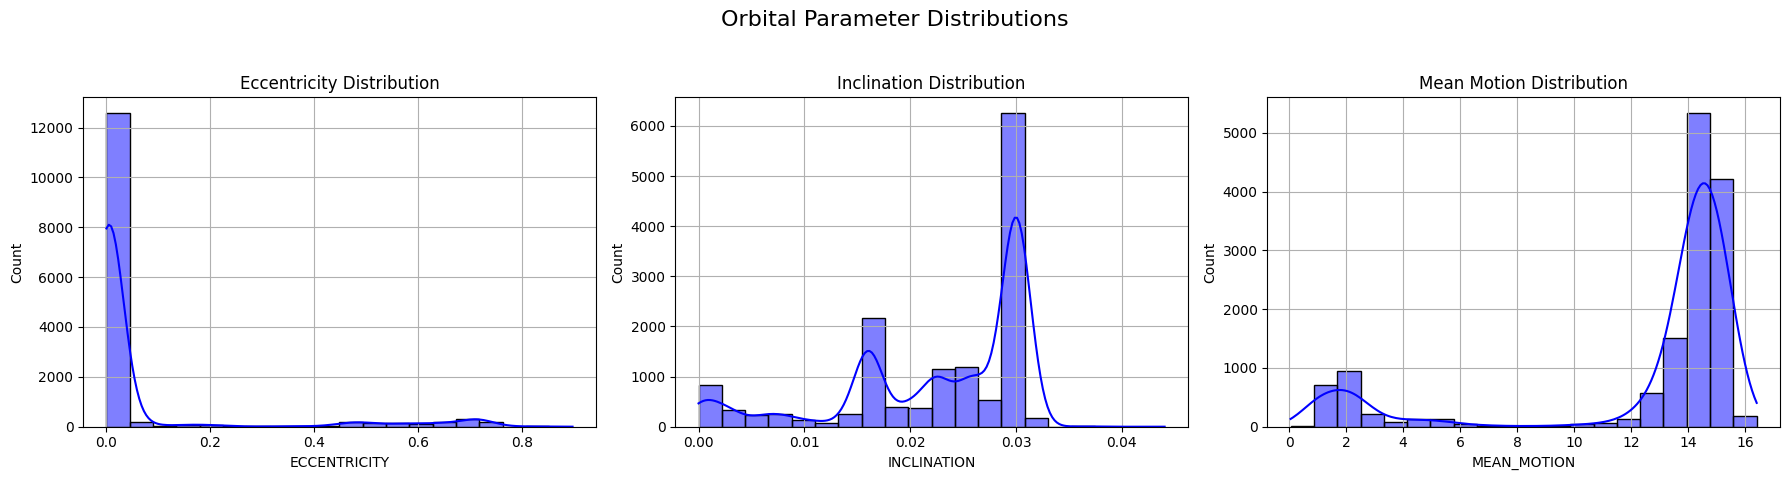

In [35]:
# Plotting Histogram

fig, axes = plt.subplots(1,3, figsize=(18, 5))  # Create a 2x2 grid of subplots
fig.suptitle('Orbital Parameter Distributions', fontsize=16)  # Title for the whole figure



#Plot histogram of eccentricity (this indicates that if the distribution is near 0 so more circular orbits are there and if the distribution is near 1 more elliptical orbits)

sns.histplot(df['ECCENTRICITY'], kde=True, bins=20, color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Eccentricity Distribution')
axes[0].grid(True)


#Plot histogram of inclination (this indicates that if the distribution is near 0 so more equatorial orbits and if the inclination is towards 90 more polar orbits)

sns.histplot(df['INCLINATION'], kde=True, bins=20, color='blue', edgecolor='black', ax=axes[1])
axes[1].set_title('Inclination Distribution')
axes[1].grid(True)

# Plot histogram: Mean Motion (this indicates that if the mean motion is very high then the object is in high altitude orbits, ex: if the distribution is near 14-16 then the orbit is LEO)

sns.histplot(df['MEAN_MOTION'], kde=True, bins=20, color='blue', edgecolor='black', ax=axes[2])
axes[2].set_title('Mean Motion Distribution')
axes[2].grid(True)

# Plot histogram: Period
#sns.histplot(df['ORBITAL_PERIOD'], kde=True, bins=20, color='blue', edgecolor='black', ax=axes[1, 1])
#axes[1, 1].set_title('Orbital Period Distribution')
#axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


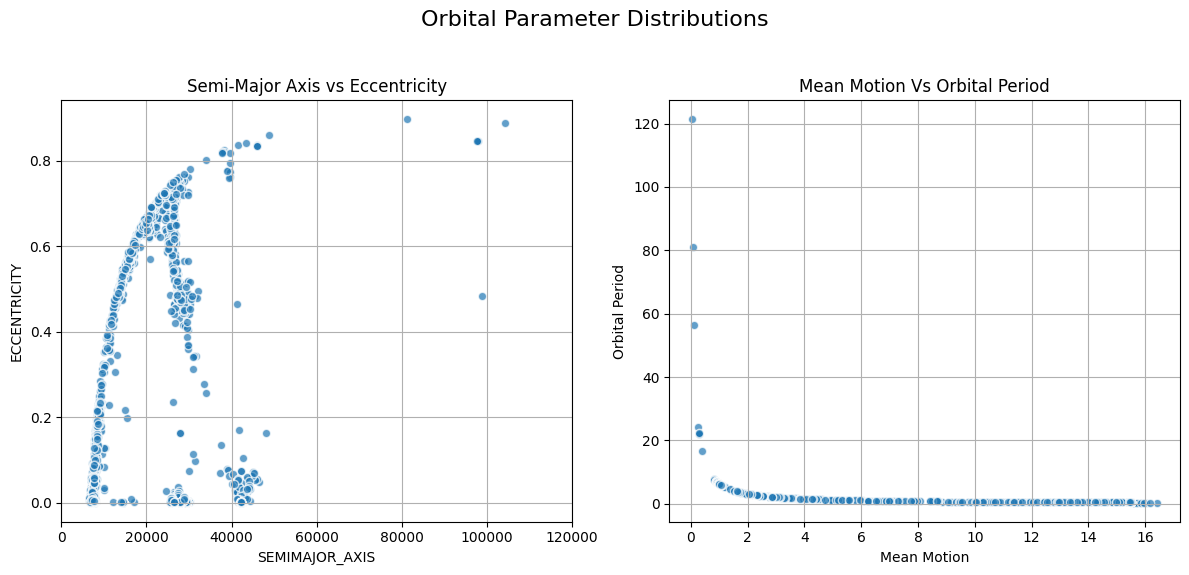

In [39]:
# Plotting scatter plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # (rows, columns)
fig.suptitle('Orbital Parameter Distributions', fontsize=16)  # Title for the whole figure

# Plot of eccentricity vs semi-major axis (this indicates that as the semi-major axis length increases, orbit tends to become more elliptical, i.e. larger orbits like GRO have more elliptical orbits)
axes[0].scatter(df['SEMIMAJOR_AXIS'], df['ECCENTRICITY'], alpha=0.7, edgecolors='w', marker='o')
axes[0].set_title('Semi-Major Axis vs Eccentricity')
axes[0].set_xlabel('SEMIMAJOR_AXIS')
axes[0].set_ylabel('ECCENTRICITY')
axes[0].grid(True)
axes[0].set_xlim(0, 120000)  # Adjust according to your data range


# Plot of Mean Motion and time period (it shows the inverse relationship between the two, The faster the mean motion (more orbits per day), the shorter the orbital period.)
axes[1].scatter(df['MEAN_MOTION'], df['ORBITAL_PERIOD'], alpha=0.7, edgecolors='w', marker='o')
axes[1].set_title('Mean Motion Vs Orbital Period')
axes[1].set_xlabel('Mean Motion')
axes[1].set_ylabel('Orbital Period')
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

Plotting for classification

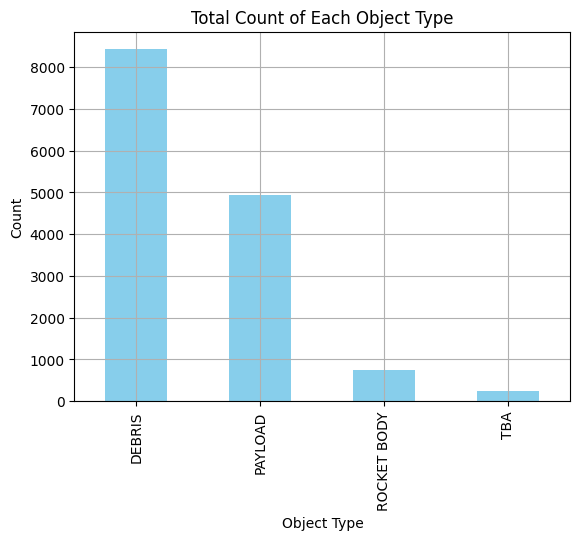

In [41]:
# Plot the total count of each object type
object_type_count.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Total Count of Each Object Type')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.grid('true')

# Show the plot
plt.show()

# CONCLUSION :  The major objects are debris

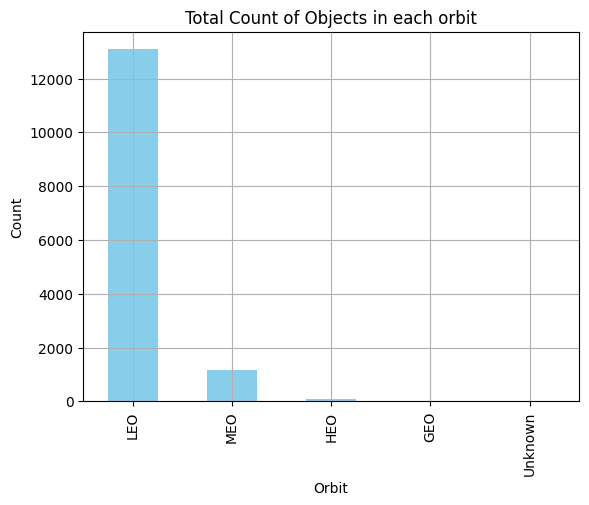

In [18]:
# Plot the total count of each object type
object_orbit.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Total Count of Objects in each orbit')
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.grid('true')

# Show the plot
plt.show()
# CONCLUSION :  The major objects are in LEO




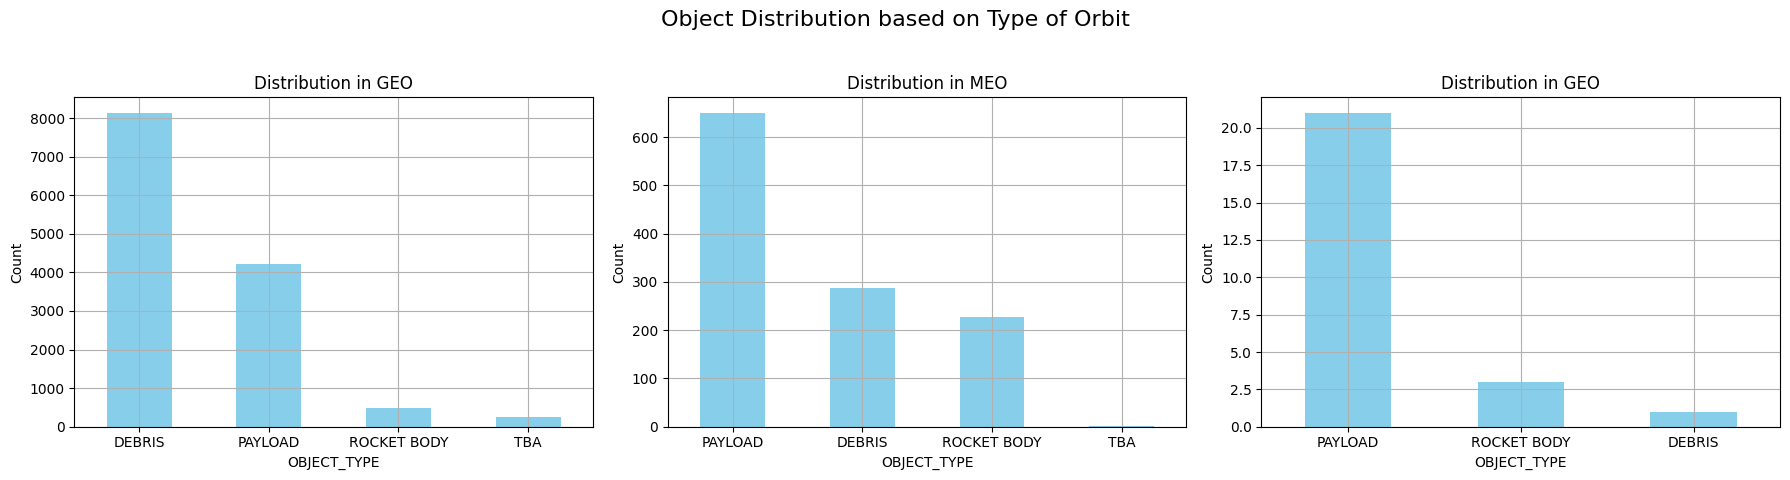

In [37]:
# PLOTS


fig, axes = plt.subplots(1,3, figsize=(18, 5))  # Create a 2x2 grid of subplots
fig.suptitle('Object Distribution based on Type of Orbit', fontsize=16)  # Title for the whole figure
# Plotting for LEO ORbit (# Conclusion # Most of the objects in LEO are debris)
leo_object_counts.plot(kind='bar', color = 'skyblue',ax=axes[0])
# Add titles and labels
axes[0].set_title('Distribution in GEO')
axes[0].tick_params(axis='x', labelrotation=360)
#axes[0,0].set_xlabel('Objects in LEO')
axes[0].set_ylabel('Count')
axes[0].grid('true')

# Plotting for MEO Orbit (# Conclusion # Most of the objects in MEO are payload)

meo_object_counts.plot(kind='bar', color = 'skyblue',ax=axes[1])
# Add titles and labels
axes[1].set_title('Distribution in MEO')
#axes[0].set_xlabel('Objects in MEO')
axes[1].tick_params(axis='x', labelrotation=360)
axes[1].set_ylabel('Count')
axes[1].grid('true')

# Plotting for GEO ORbit (# Conclusion # Most of the objects in GEO are payload)
geo_object_counts.plot(kind='bar', color = 'skyblue',ax=axes[2])
# Add titles and labels
axes[2].set_title('Distribution in GEO')
axes[2].tick_params(axis='x', labelrotation=360)
#axes[2].set_xlabel('Objects in GEO')
axes[2].set_ylabel('Count')
axes[2].grid('true')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

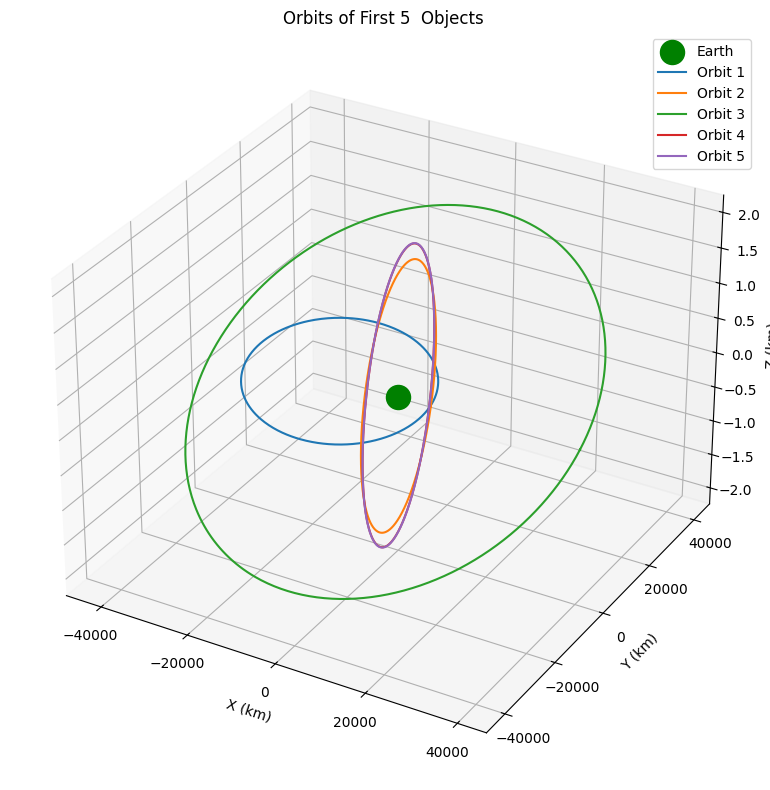

In [46]:
# plotting the orbits around the earth

# === Convert all angular quantities before plotting ===
df['INCLINATION'] = np.radians(df['INCLINATION'])
df['RA_OF_ASC_NODE'] = np.radians(df['RA_OF_ASC_NODE'])
df['ARG_OF_PERICENTER'] = np.radians(df['ARG_OF_PERICENTER'])
df['MEAN_ANOMALY'] = np.radians(df['MEAN_ANOMALY'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0, color='green', s=300, label='Earth')

for idx, row in df.iloc[:5].iterrows():
    a = row['SEMIMAJOR_AXIS']         # km
    e = row['ECCENTRICITY']
    i = row['INCLINATION']
    RAAN = row['RA_OF_ASC_NODE']
    w = row['ARG_OF_PERICENTER']

    # Full orbit angle sweep
    theta = np.linspace(0, 2*np.pi, 500)
    r = a * (1 - e**2) / (1 + e * np.cos(theta))

    # ECI conversion
    x = r * (np.cos(RAAN)*np.cos(w+theta) - np.sin(RAAN)*np.sin(w+theta)*np.cos(i))
    y = r * (np.sin(RAAN)*np.cos(w+theta) + np.cos(RAAN)*np.sin(w+theta)*np.cos(i))
    z = r * (np.sin(i) * np.sin(w + theta))

    ax.plot(x, y, z, label=f'Orbit {idx+1}')

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Orbits of First 5  Objects')
ax.legend()
plt.tight_layout()
plt.show()


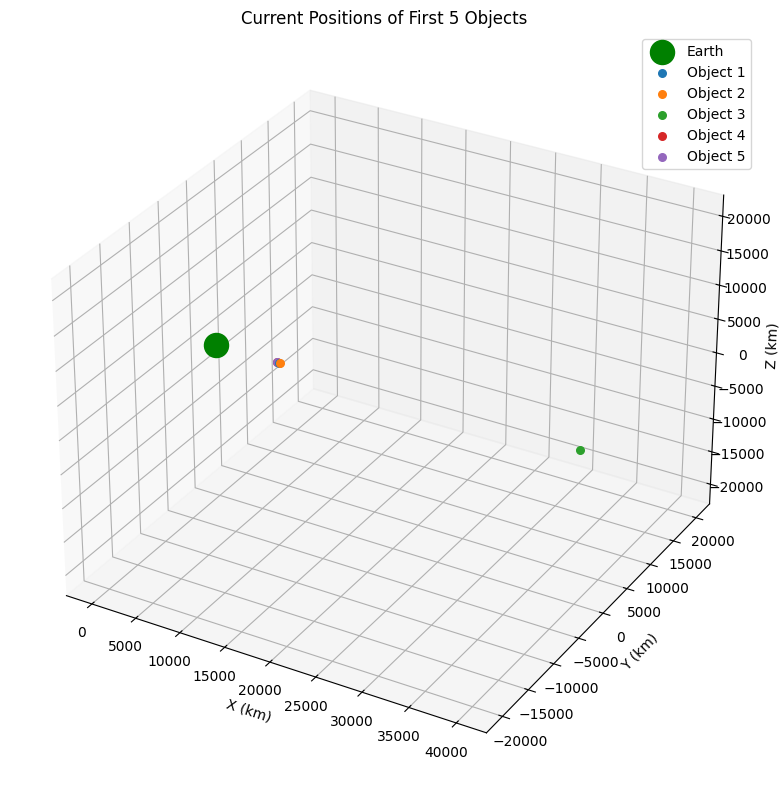

In [45]:
## Here the current location of the objects in the orbit is shown



# Convert angles from degrees to radians
df['INCLINATION'] = np.radians(df['INCLINATION'])
df['RA_OF_ASC_NODE'] = np.radians(df['RA_OF_ASC_NODE'])
df['ARG_OF_PERICENTER'] = np.radians(df['ARG_OF_PERICENTER'])
df['MEAN_ANOMALY'] = np.radians(df['MEAN_ANOMALY'])

# Solve Kepler's Equation: E - e*sin(E) = M
def solve_kepler(M, e, tol=1e-8):
    E = M  # Initial guess
    for _ in range(10):  # Newton-Raphson
        E_new = E - (E - e*np.sin(E) - M) / (1 - e*np.cos(E))
        if abs(E_new - E) < tol:
            break
        E = E_new
    return E

# Convert Eccentric Anomaly to True Anomaly
def true_anomaly(E, e):
    return 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                          np.sqrt(1 - e) * np.cos(E / 2))

# Function to ensure equal aspect ratio on 3D axes
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so spheres look like spheres.'''
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # Set plot radius to max range
    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Initialize 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0, color='green', s=300, label='Earth')

# Plot Earth as a sphere
#u, v = np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100)
#earth_radius = 6371  # km
#x_sphere = earth_radius * np.outer(np.cos(u), np.sin(v))
#y_sphere = earth_radius * np.outer(np.sin(u), np.sin(v))
#z_sphere = earth_radius * np.outer(np.ones_like(u), np.cos(v))
#ax.plot_surface(x_sphere, y_sphere, z_sphere, color='blue', alpha=0.3)

# Plot current positions of first N objects
N = 5 # You can change this number
for idx, row in df.iloc[:N].iterrows():
    a = row['SEMIMAJOR_AXIS']      # km
    e = row['ECCENTRICITY']
    i = row['INCLINATION']
    RAAN = row['RA_OF_ASC_NODE']
    w = row['ARG_OF_PERICENTER']
    M0 = row['MEAN_ANOMALY']

    # Compute current true anomaly
    E = solve_kepler(M0, e)
    theta = true_anomaly(E, e)

    # Compute radius
    r = a * (1 - e**2) / (1 + e * np.cos(theta))

    # Convert to ECI coordinates
    x = r * (np.cos(RAAN) * np.cos(w + theta) - np.sin(RAAN) * np.sin(w + theta) * np.cos(i))
    y = r * (np.sin(RAAN) * np.cos(w + theta) + np.cos(RAAN) * np.sin(w + theta) * np.cos(i))
    z = r * (np.sin(i) * np.sin(w + theta))

    # Plot current position
    ax.scatter(x, y, z, label=f'Object {idx+1}', s=30)

# Final plot settings
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Current Positions of First 5 Objects')

# Set equal aspect ratio
set_axes_equal(ax)

# Show legend and layout
ax.legend()
plt.tight_layout()
plt.show()
